In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['exploring_text_data']


In [9]:
import pandas as pd 
dataset = pd.read_csv('../input/exploring_text_data/Exploring Text Data/tweets.csv', encoding = 'ISO-8859-1')

dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


<h3>Generating Word Frequency</h3>

In [20]:
def gen_freq(text):
   # print("This is text",text)
    #store the list of words
    word_list = []
    
    #Loop over all the tweets and extract words into word_list
    for words in text.split():
        #print("This is words",words)
        word_list.extend(words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    print(word_freq[:20])    
    return word_freq


<h3>EDA using Word Clouds</h3>

In [21]:
!pip install wordcloud

RT                 11053
to                  7650
is                  5152
in                  4491
the                 4331
of                  4053
#Demonetization     3253
demonetization      3162
on                  2751
#demonetization     2474
PM                  2384
Modi                2379
India               2243
and                 2220
a                   2180
that                2168
out                 1729
for                 1672
so                  1599
had                 1598
dtype: int64


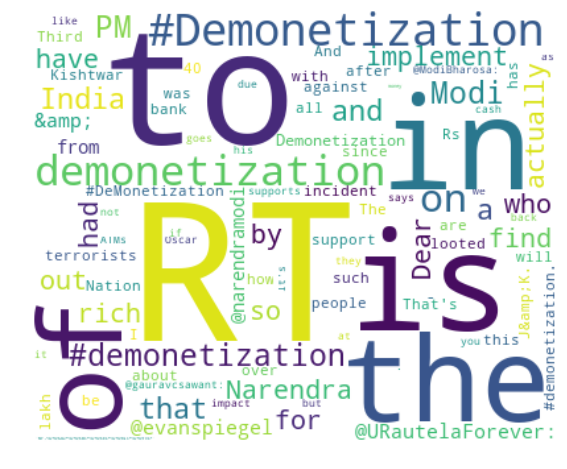

In [24]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word frequencies
word_freq = gen_freq(dataset.text.str)

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Text Cleaning**

In [25]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [27]:
#Import list of stopwards
from wordcloud import STOPWORDS

#print(STOPWORDS)

demonetization    13872
to                 7722
is                 5354
the                5116
in                 4710
of                 4109
and                2907
on                 2811
india              2752
modi               2748
pm                 2729
a                  2390
that               2201
out                1859
so                 1752
for                1732
who                1624
had                1603
narendra           1566
by                 1516
dtype: int64


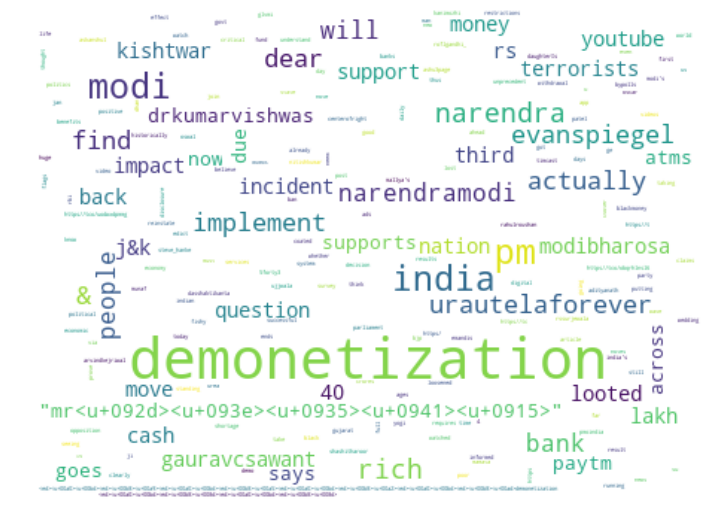

In [28]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()